In [59]:
#importing dependencies
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

# 1. Provide a visual representation of our annual sales performance over time?

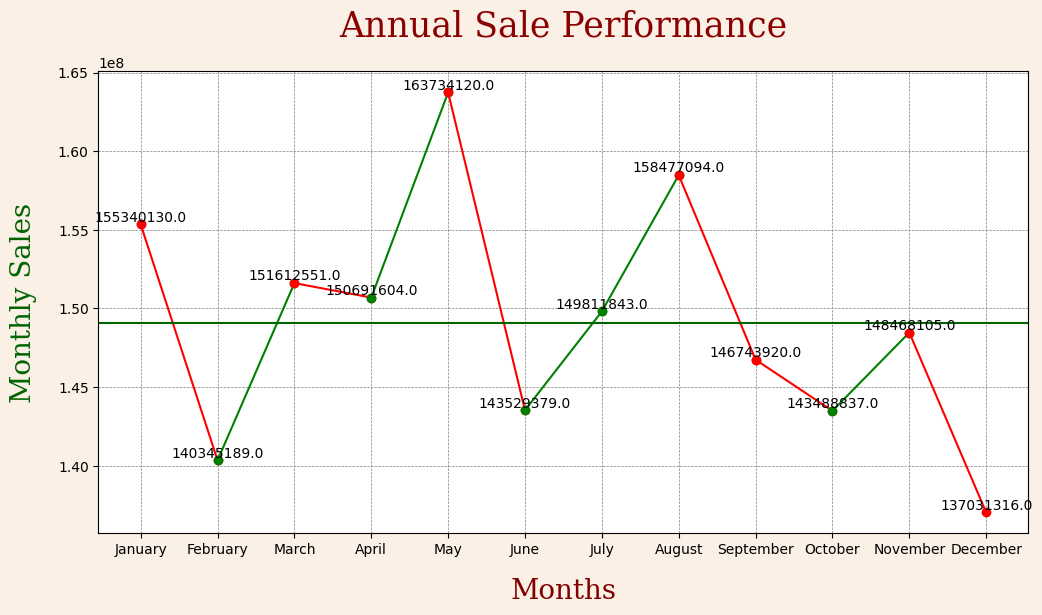

In [60]:
#SQL Query
query='''select Months , M_sales
        from (select month(SaleDate),monthname(SaleDate) as Months,sum(TotalPrice) as M_sales
from salesdata
group by month(SaleDate),Months
order by month(SaleDate)) t;'''

#Executing Query
df = read_query(query=query)

#Assign Variable
Months = df['Months'].values
Monthly_sales=df['M_sales'].astype(float).values
monthly_avg=df['M_sales'].mean()


previous=Monthly_sales[0]
m=1

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
plt.plot(Months[0],previous,marker='o')

for i in Monthly_sales[1:]:
    if i>previous:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='green',marker='o')
    else:
        plt.plot([Months[m-1],Months[m]],[previous,i],color='red',marker='o')
    previous=i
    m+=1

plt.title('Annual Sale Performance',fontdict={'family':'serif','size':25,'color':'darkred'},pad=25)
plt.xlabel("Months",fontdict={'family':'serif','size':20,'color':'maroon'},labelpad=15)
plt.ylabel("Monthly Sales",fontdict={'family':'serif','size':20,'color':'darkgreen'},labelpad=15)
plt.axhline(y=monthly_avg,color='darkgreen')

#Annotating Graph
for j in range(len(Months)):
    plt.annotate(text=Monthly_sales[j],xy=(j,Monthly_sales[j]),
                horizontalalignment='center',
                verticalalignment='bottom')

plt.grid(linestyle='--',color='gray',linewidth=0.5)
plt.show()

## 2. The client is interested in understanding how the sales have been fluctuating over time to identify any underlying patterns or anomalies Analyze the trend in our monthly sales using a moving average technique

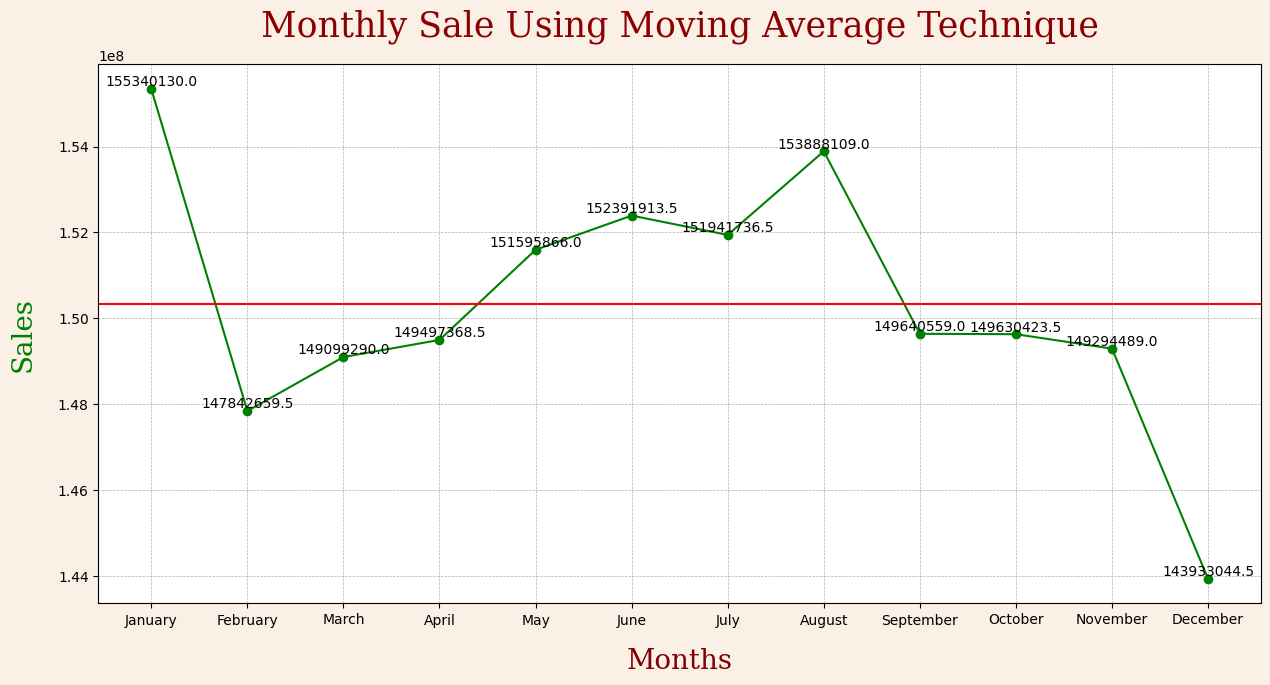

In [61]:
#SQL Query
query='''select Months, 
avg(monthlysale) over(order by monthnum rows between 3 
preceding and current row) as moving_average
from  
(select 
month(SaleDate) as monthnum, Monthname(SaleDate) as Months,sum(TotalPrice) as monthlysale
from salesdata
group by monthnum,Months) t;'''

#Query Execution
monthly_sale = read_query(query=query)

#Variables
months=monthly_sale['Months'].values
sale=monthly_sale['moving_average'].astype(float).values
monthly_avg=monthly_sale['moving_average'].mean()

#Ploting Graph
plt.figure(figsize=(15,7),facecolor='linen')
plt.plot(months,sale,color='green',marker='o')
plt.title('Monthly Sale Using Moving Average Technique',pad=20,fontdict={'family':'serif','size':25,'color':'darkred'})
plt.xlabel('Months',fontdict={'family':'serif','size':20,'color':'maroon'},labelpad=15)
plt.ylabel('Sales',fontdict={'family':'serif','size':20,'color':'green'},labelpad=15)
plt.axhline(y=monthly_avg,color='red')

#Annotating Graph
for i in range(len(months)):
    plt.annotate(text=sale[i],xy=(i,sale[i]),
    horizontalalignment='center',
    verticalalignment='bottom')

#Grid
plt.grid(ls='--',lw=0.5)
plt.show()

# 3. Explore the month-over-month growth rate in sales

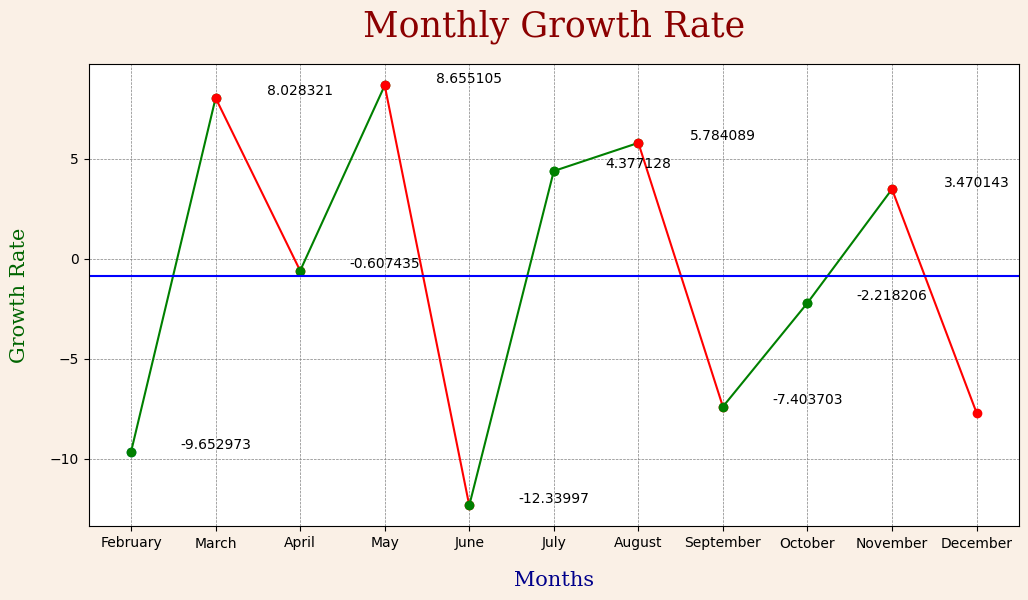

In [62]:
#SQL Query
query = '''select months,T_sales,
lag(T_sales) over(),
100*(T_sales-lag(T_sales) over())/lag(T_sales) over() as Growth_Rate
from (select month(SaleDate),monthname(SaleDate) as months,sum(TotalPrice) as T_sales
from salesdata
group by month(SaleDate),months
order by month(SaleDate)) t;'''

#Query Executing
G_rate=read_query(query=query)

#creating Variable
Month=G_rate['months'].values
G_rate['Growth_Rate']=G_rate['Growth_Rate'].astype(float)
Growth=G_rate['Growth_Rate'].values
Avg_growth=G_rate['Growth_Rate'].mean()

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
#plt.plot(Month,Growth,color='darkgreen',marker='o')

previous=Growth[1]
m=2


plt.plot(Month[1],previous,marker='o')

for j in Growth[2:]:
    if j>previous:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='green',marker='o')
    else:
        plt.plot([Month[m-1],Month[m]],[previous,j],color='red',marker='o')
    previous=j
    m+=1
    
plt.axhline(Avg_growth,color='blue')
plt.title("Monthly Growth Rate",fontdict={'family':'serif','size':25,'color':'darkred'},pad=20)
plt.xlabel("Months",fontdict={'family':'serif','size':15,'color':'darkblue'},labelpad=15)
plt.ylabel("Growth Rate",fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)

#Annotating Graph
for i in range(len(Month)):
    plt.annotate(text=Growth[i],xy=(i,Growth[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    
    

plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 4. identify the top-performing sales representatives based on their total sales volume

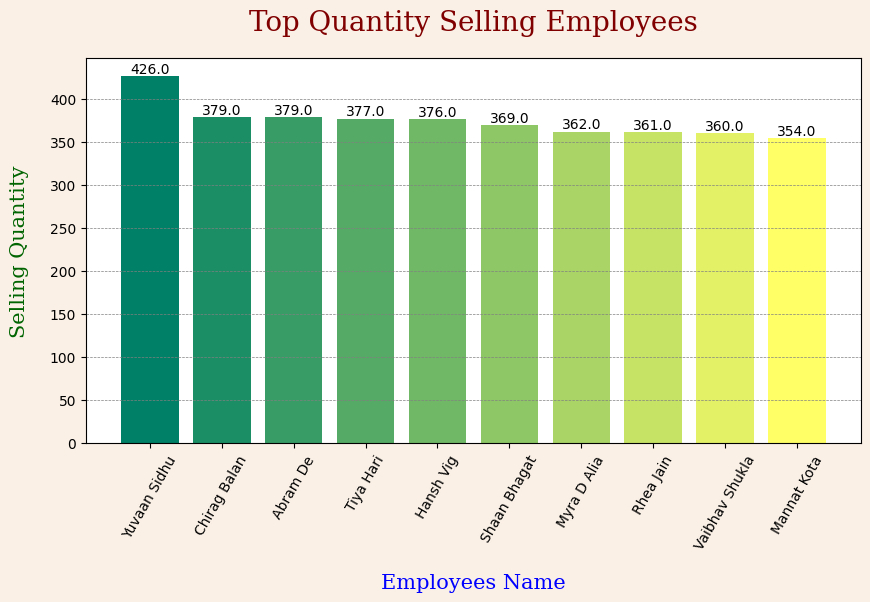

In [64]:
#Sql Query
query='''select 
	e.EmployeeID, concat(e.FirstName,' ',e.Lastname)as Emp_name,sum(s.Quantity) as Quantites,sum(s.TotalPrice) as Total_sales
from
	salesdata s
join
	employees e
on
	e.EmployeeID=s.EmployeeID
group by
	e.EmployeeID
order by
	Quantites desc
limit 10;'''

#Execute Query
Top_perf=read_query(query=query)

#Taking Variables
Top_emp=Top_perf['Emp_name'].values
S_quantities=Top_perf['Quantites'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
plt.bar(height=S_quantities,x=Top_emp,color=cmap)
plt.title('Top Quantity Selling Employees',fontdict={'family':'serif','color':'maroon','size':20},pad=20)
plt.xlabel('Employees Name',fontdict={'family':'serif','color':'blue','size':15},labelpad=15)
plt.ylabel('Selling Quantity',fontdict={'family':'serif','color':'darkgreen','size':15},labelpad=15)
plt.xticks(rotation=60)

#Annotate graph
for i in range(len(Top_emp)):
    plt.annotate(text=S_quantities[i],xy=(i,S_quantities[i]),
                 horizontalalignment='center',
				 verticalalignment='bottom')

plt.grid(axis='y',linestyle="--",linewidth=0.5,color='gray')
plt.show()

# 5. What are the total sales made by each employee?

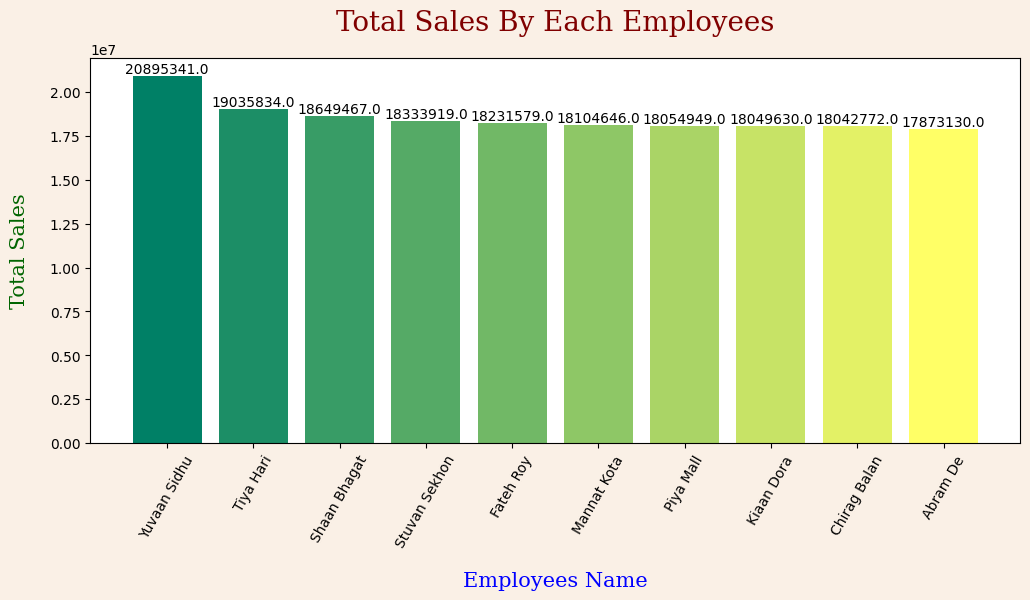

In [65]:
#Sql Query
query='''Select s.EmployeeID , concat(e.FirstName," ",e.LastName) as Emp_Name,sum(s.TotalPrice) as T_sales
from employees e
join salesdata s
on e.EmployeeID=s.EmployeeID
group by s.EmployeeID,Emp_Name
order by T_sales desc
limit 10;'''

#Execute Query
Emp_sales=read_query(query=query)

#Assign Variables
Employees=Emp_sales['Emp_Name'].values
T_sales=Emp_sales['T_sales'].astype(float).values

#Cmap Values
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,5),facecolor='linen')
plt.bar(height=T_sales,x=Employees,color=cmap)
plt.title('Total Sales By Each Employees',fontdict={'family':'serif','size':20,'color':'maroon'},pad=20)
plt.xlabel('Employees Name',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=60)

#Annotating Graph
for i in range(len(Employees)):
    plt.annotate(text=T_sales[i],xy=(i,T_sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

#plt.grid(linestyle='--',linewidth=0.5,color='gray')
plt.show()


# 6. Which category has the highest total sales?

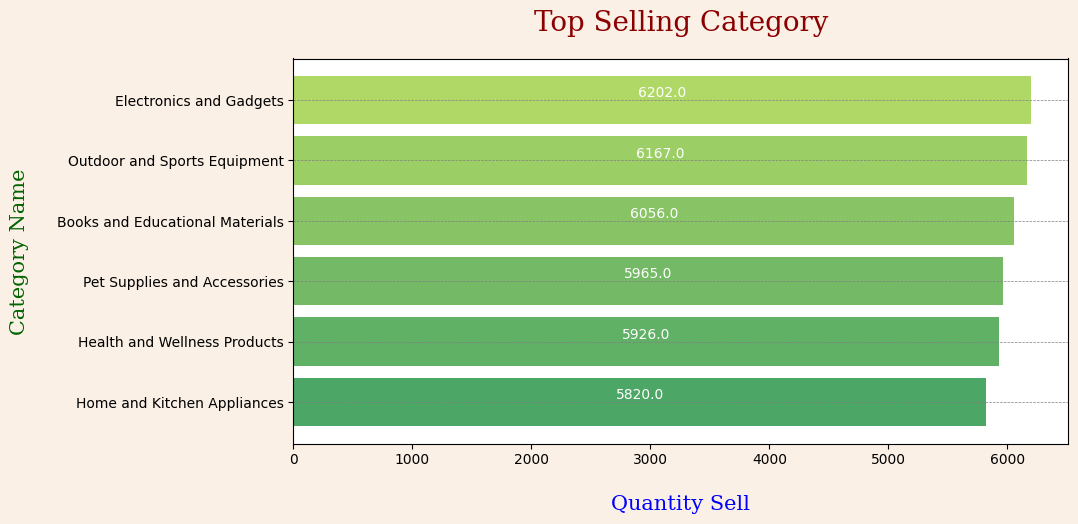

In [66]:
#Sql Query
query = '''select 
    c.Categoryname,c.CategoryID ,sum(t.Quantity) as Total_Quantity,sum(t.TotalPrice) as Total_Price
from 
    categories c
join 
    (select s.SubcatID,s.Quantity,s.TotalPrice,a.CategoryID 
        from 
            salesdata s
    join 
        subcategories a
    on 
        s.SubcatID=a.SubcatID) t
on 
    c.CategoryID=t.CategoryID
group by 
    c.CategoryID
order by 
    Total_Quantity;'''

#Execute Query
H_category = read_query(query=query)

#Assign Variable
C_name=H_category['Categoryname'].values
H_category['Total_Quantity']=H_category['Total_Quantity'].astype(float)
T_quantity=H_category['Total_Quantity'].values

#Fonts
font={'family':'serif','color':'darkred','size':20}
fontx={'family':'serif','color':'blue','size':15}
fonty={'family':'serif','color':'darkgreen','size':15}

#Cmap
cm_va=np.linspace(0.3,1,10)
cmap=plt.cm.summer(cm_va)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
#plt.plot(C_name,T_quantity,marker='o',color='darkred')
plt.barh(C_name,T_quantity,color=cmap)
plt.title('Top Selling Category', fontdict=font, pad=20)
plt.xlabel('Quantity Sell',labelpad=20,fontdict=fontx)
plt.ylabel('Category Name',labelpad=20,fontdict=fonty)

#Annotating Graph
for i in range(len(C_name)):
    plt.annotate(text=T_quantity[i],xy=(T_quantity[i]/2,i),
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 color='white')
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 7. How many customers are there in each state?

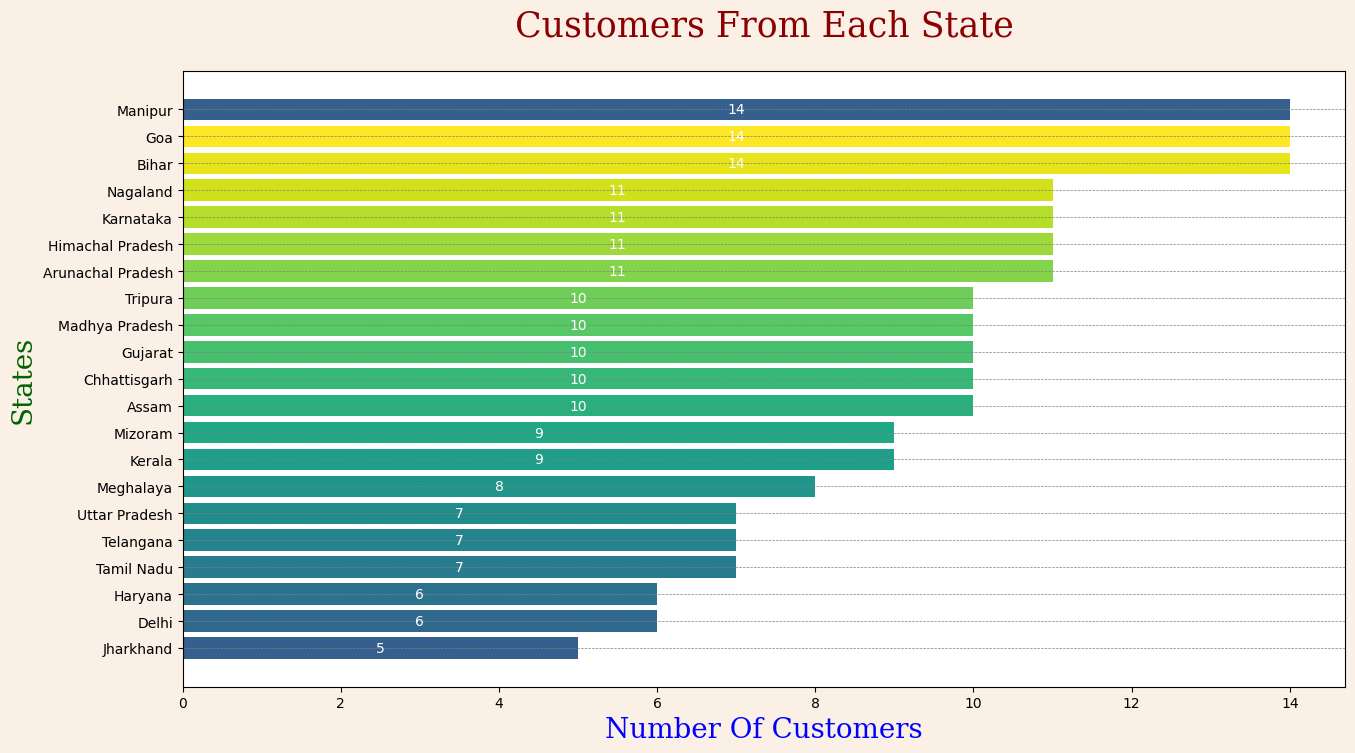

In [67]:
#Sql Query
query='''select State,count(distinct(CustomerID))  as Num_Cust
from customers
group by State
order by Num_Cust;'''

#Execute Query
C_state=read_query(query=query)

#Assign Variables
states=C_state['State'].values
N_cust=C_state['Num_Cust'].astype(int).values


#Cmap
cmap_value=np.linspace(0.3,1,20)
cmap=plt.cm.viridis(cmap_value)

#Fonts
font={'family':'serif','size':25,'color':'darkred'}
fontx={'family':'serif','size':20,'color':'blue'}
fonty={'family':'serif','size':20,'color':'darkgreen'}

#Ploting Graph
plt.figure(figsize=(15,8),facecolor='linen')
#plt.plot(N_cust,states,color='darkred',marker='o')
plt.barh(y=states,width=N_cust,color=cmap)
plt.title('Customers From Each State',pad=25,fontdict=font)
plt.xlabel('Number Of Customers',fontdict=fontx)
plt.ylabel('States',fontdict=fonty)

#Annotating Graph
for i in range(len(N_cust)):
    plt.annotate(text=N_cust[i],xy=(N_cust[i]/2,i),
                 horizontalalignment='center',
                 verticalalignment='center',color='white')

#Gridlines
plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 8. What is the average quantity of each product sold?

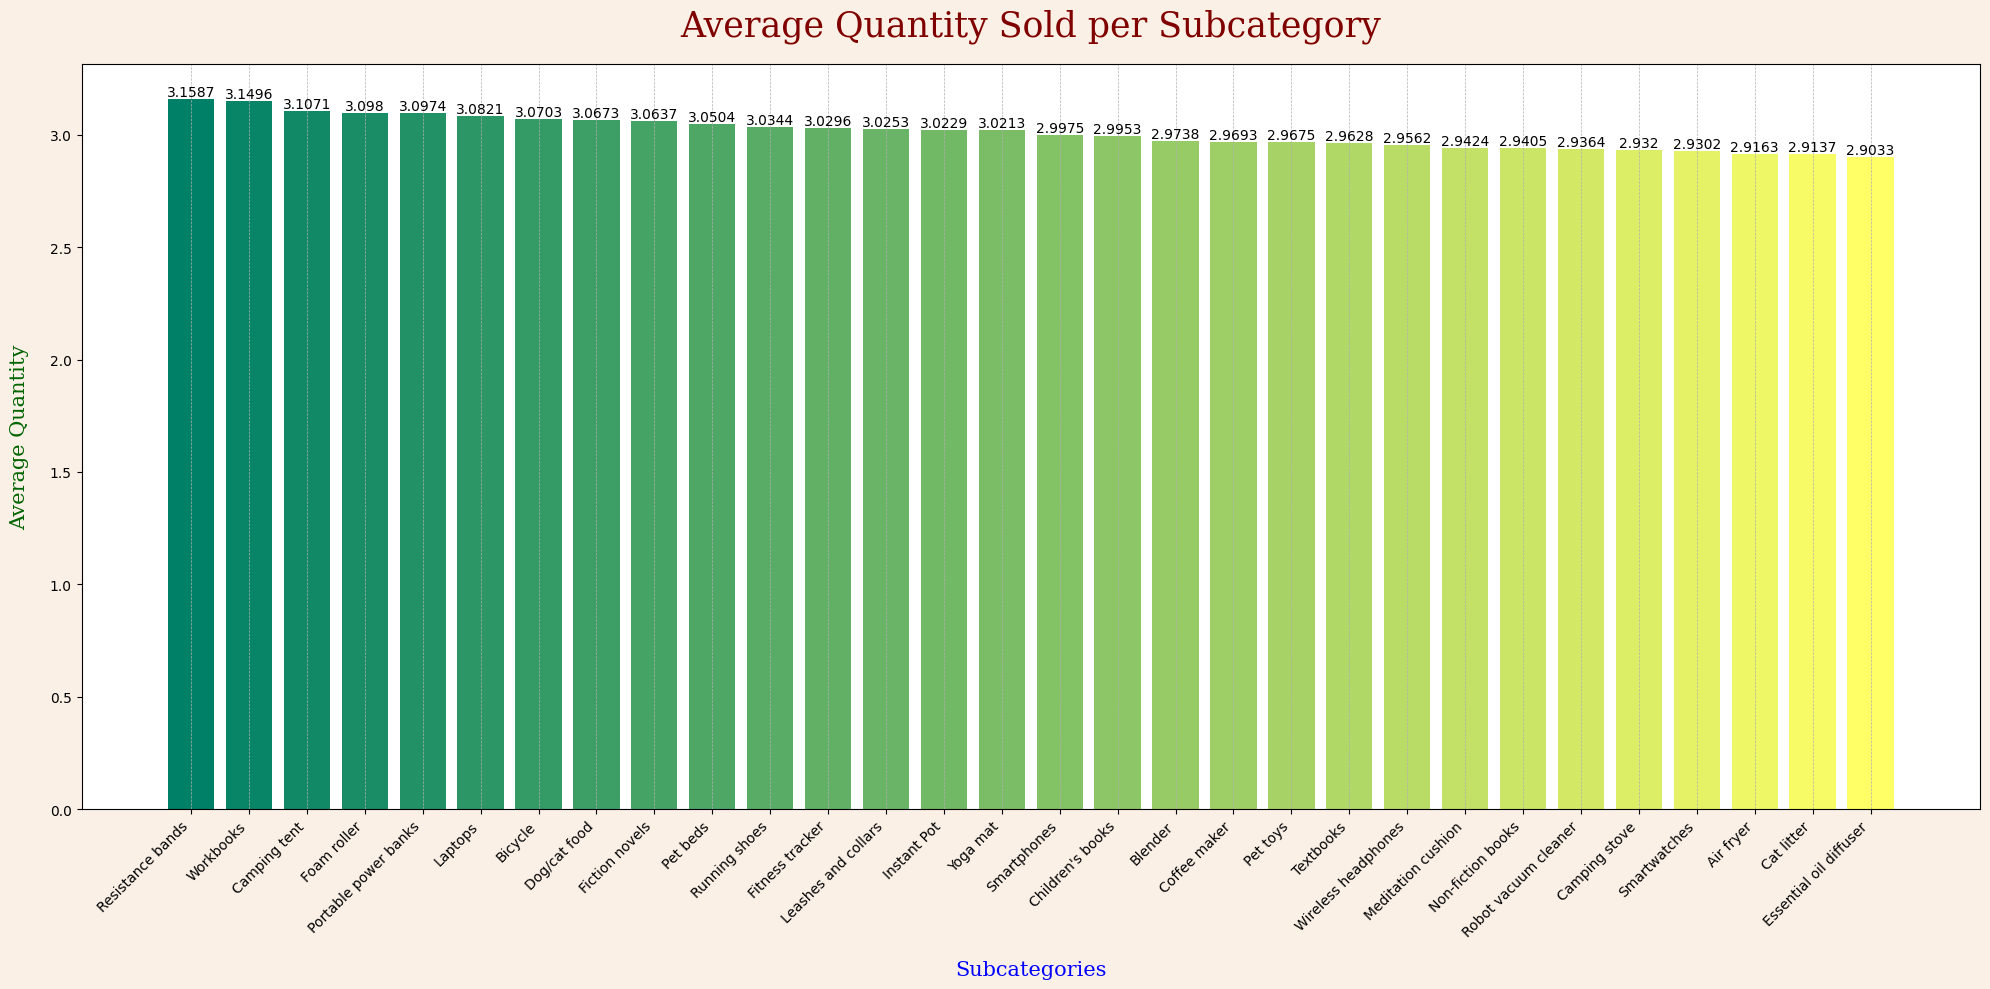

In [68]:
#SQL Query
query='''select 
	c.SubcatName,avg(s.Quantity) as Avg_quantity ,sum(s.TotalPrice) as Total_sales
from
	subcategories c
join
	salesdata s
on 
	c.SubcatID=s.SubcatID
group by 
	c.SubcatName
order by
	Avg_quantity desc;'''

#Execute Query
Avg_quant=read_query(query=query)

#Assign Variable
quantities=Avg_quant['Avg_quantity'].astype(float).values
subcategories=Avg_quant['SubcatName'].values

#Cmap
cmap_value=np.linspace(0,1,30)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(20,10),facecolor='linen')
plt.bar(subcategories, quantities, color=cmap)
plt.xlabel('Subcategories',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Average Quantity',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.title('Average Quantity Sold per Subcategory',fontdict={'family':'serif','size':25,'color':'maroon'},pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Annotating Graph
for i in range(len(subcategories)):
    plt.annotate(text=quantities[i],xy=(i,quantities[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(axis='x',ls='--',lw=0.5)
plt.show()

# 9. Which supplier has the highest total sales?

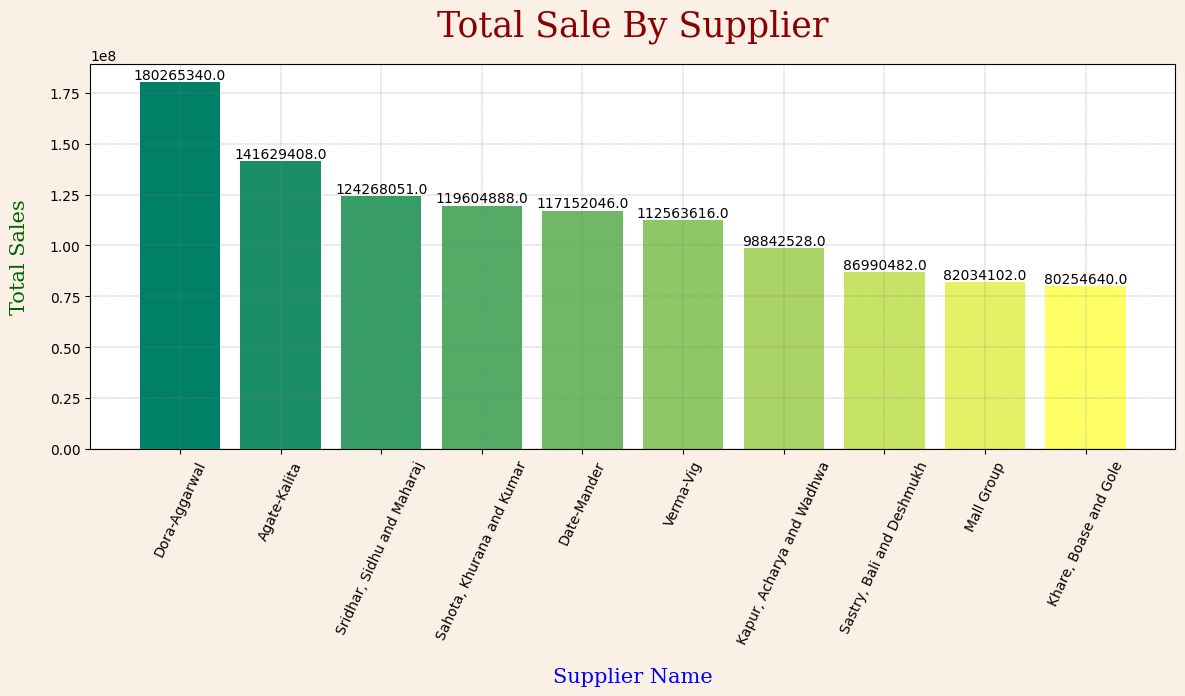

In [69]:
#SQL Query
query='''select s.SupplierID,s.SupplierName ,sum(t.TotalPrice) as Total_sales
from suppliers s
join (select c.SupplierID,s.TotalPrice
from salesdata s
join subcategories c
on s.SubcatID=c.SubcatID) t
on s.SupplierID=t.SupplierID
group by s.SupplierID 
order by Total_sales desc
limit 10;'''

#Executing Query
S_sales=read_query(query=query)

#Assign Variable
Supplier=S_sales['SupplierName'].values
Sales=S_sales['Total_sales'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Figure
plt.figure(figsize=(14,5),facecolor='linen')
plt.bar(height=Sales,x=Supplier,color=cmap)
plt.title('Total Sale By Supplier',fontdict={'family':'serif','size':25,'color':'darkred'},pad=20)
plt.xlabel('Supplier Name',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.ylabel('Total Sales',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=65)

#Annotating Graph
for i in range(len(Supplier)):
    plt.annotate(text=Sales[i],xy=(i,Sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(linestyle='--',linewidth=0.3,color='gray')
plt.show()

# 10. What is the total revenue generated from sales in each state?

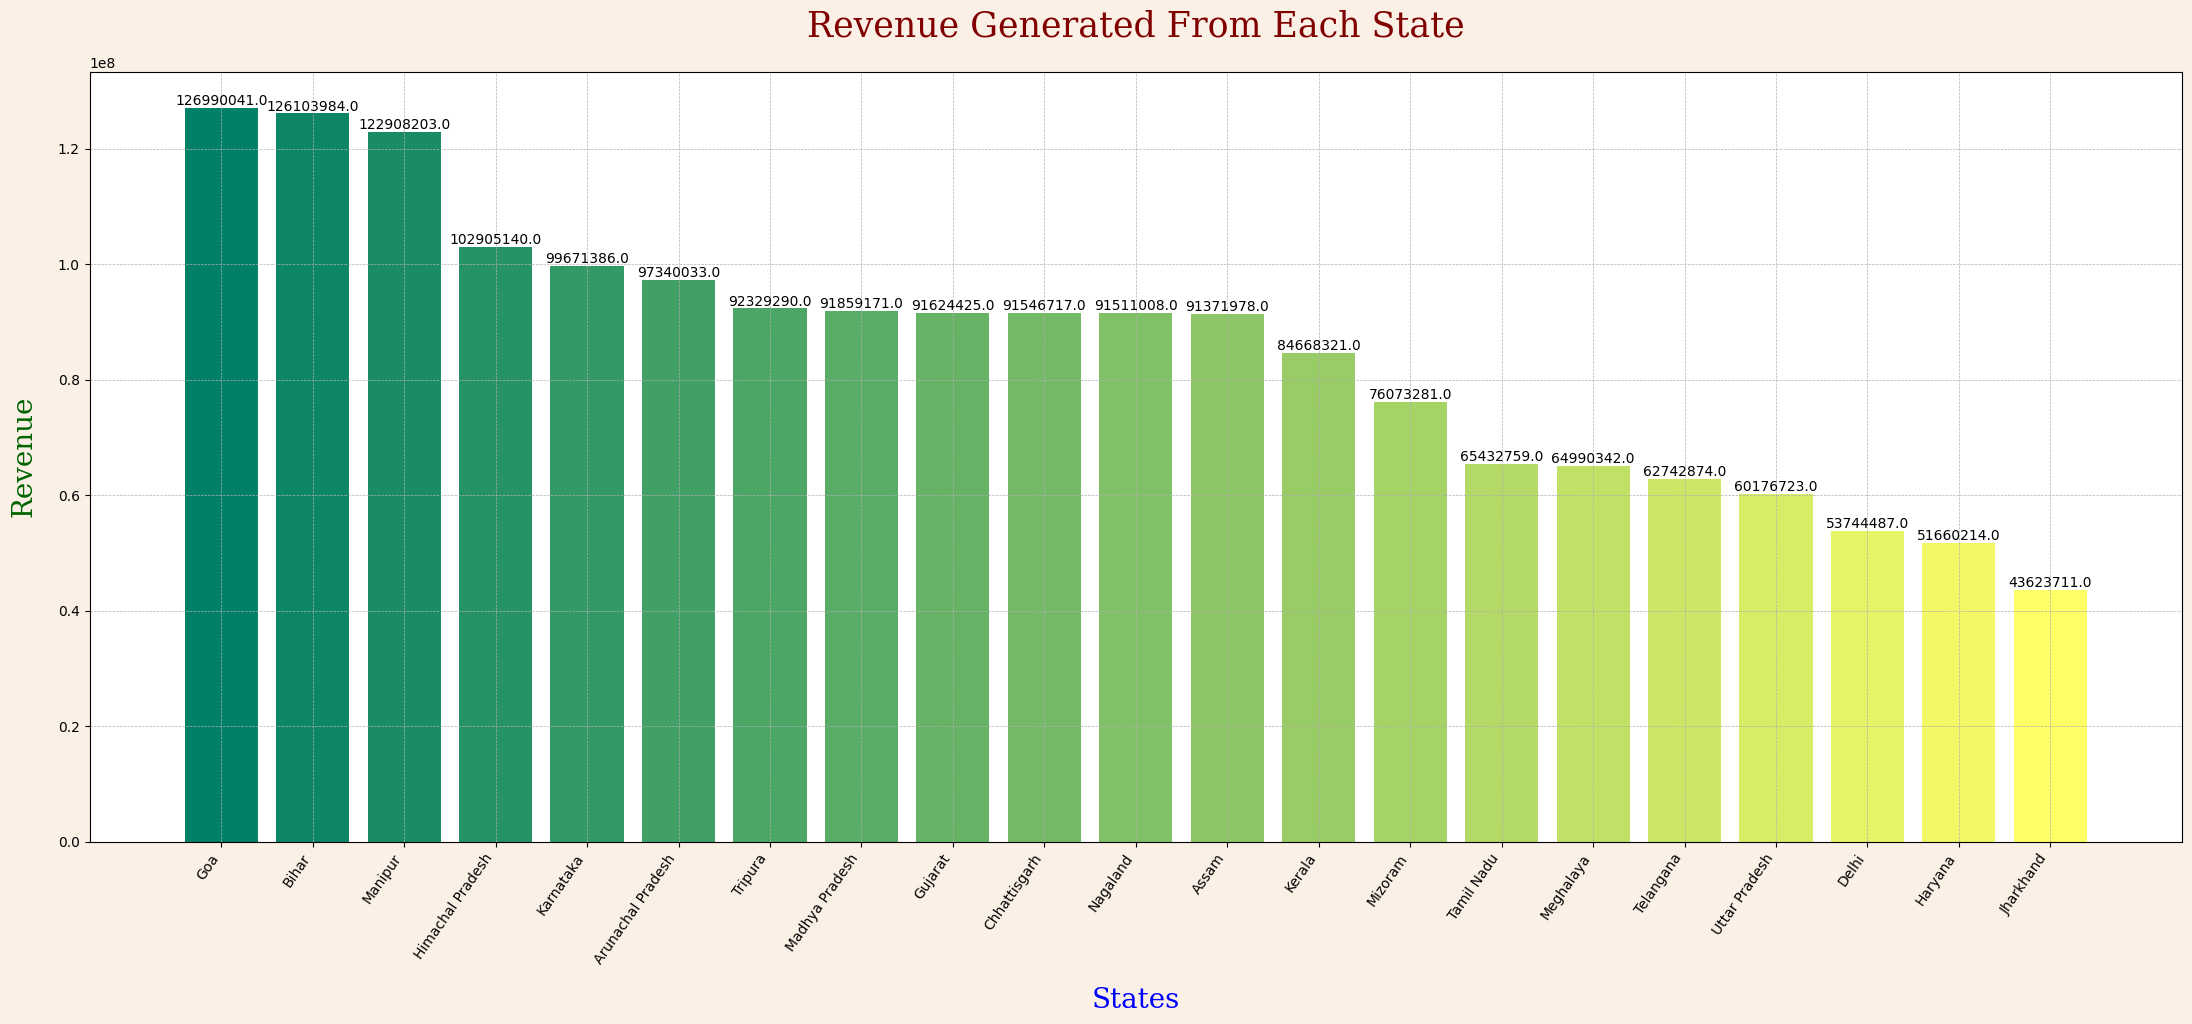

In [70]:
#SQL Query
query='''select c.State,sum(s.TotalPrice) as T_revenue
from customers c
join salesdata s
on c.CustomerID=s.CustomerID
group by c.State
order by T_revenue desc;'''

#Execute Query
state_rev=read_query(query=query)

#Assign Variable
state=state_rev['State'].values
revenue=state_rev['T_revenue'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,21)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(27,10),facecolor='linen')
plt.bar(height=revenue,x=state,color=cmap)
plt.title('Revenue Generated From Each State',fontdict={'family':'serif','size':25,'color':'maroon'},pad=25)
plt.xlabel('States',fontdict={'family':'serif','size':20,'color':'blue'},labelpad=15)
plt.ylabel('Revenue',fontdict={'family':'serif','size':20,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=55,ha='right')

#Annotating Graph
for i in range(len(state)):
    plt.annotate(text=revenue[i],xy=(i,revenue[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(ls='--',lw=0.5)
plt.show()

# 11. How many sales were made by each customer?

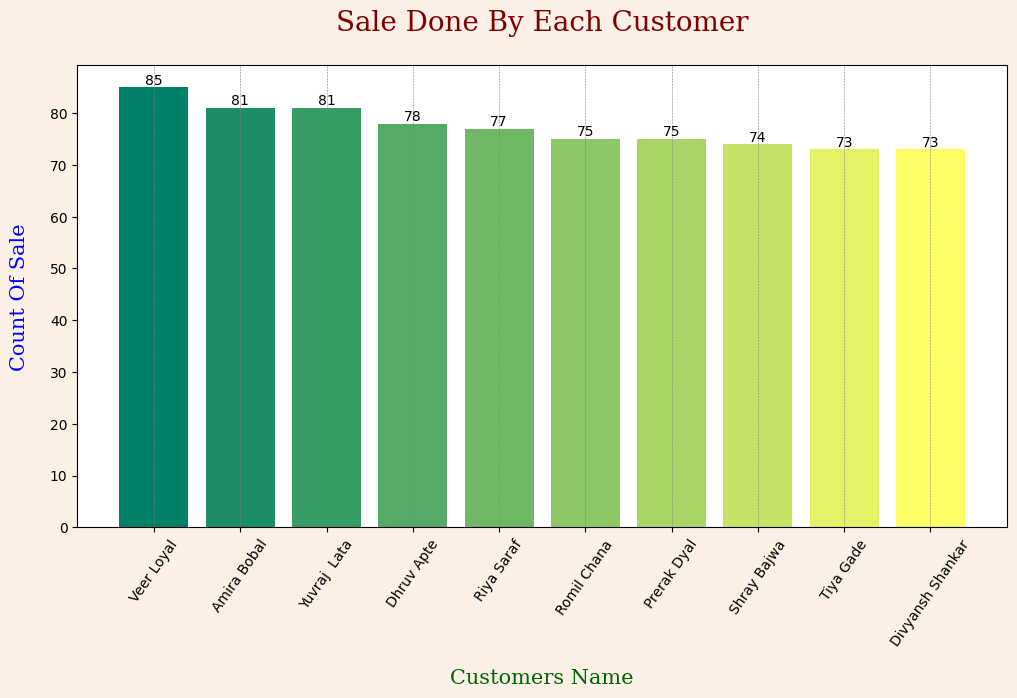

In [71]:
# SQL Query
query='''select s.CustomerID,concat(c.FirstName," ",c.LastName) as Cust_Names, count(s.CustomerID) as Cust_buy
from
	salesdata s
join
	customers c
on 
	c.CustomerID=s.CustomerID
group by
	s.CustomerID,Cust_Names
order by
	Cust_buy desc
limit 10;'''

#Execute Query
S_cust=read_query(query=query)

#Asign Variables
Cust_name=S_cust['Cust_Names'].values
Cust_buy=S_cust['Cust_buy'].values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,6),facecolor='linen')
plt.bar(height=Cust_buy,x=Cust_name,color=cmap)
plt.title('Sale Done By Each Customer',fontdict={'family':'serif','size':20,'color':'maroon'},pad=25)
plt.xlabel('Customers Name',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.ylabel('Count Of Sale',fontdict={'family':'serif','size':15,'color':'blue'},labelpad=15)
plt.xticks(rotation=55)

#Annoting Graph
for i in range(len(Cust_name)):
    plt.annotate(text=Cust_buy[i],xy=(i,Cust_buy[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(axis='x',linestyle="--",linewidth=0.4,color='gray')
plt.show()

# 12. What is the total salary expenditure on employees in each department?

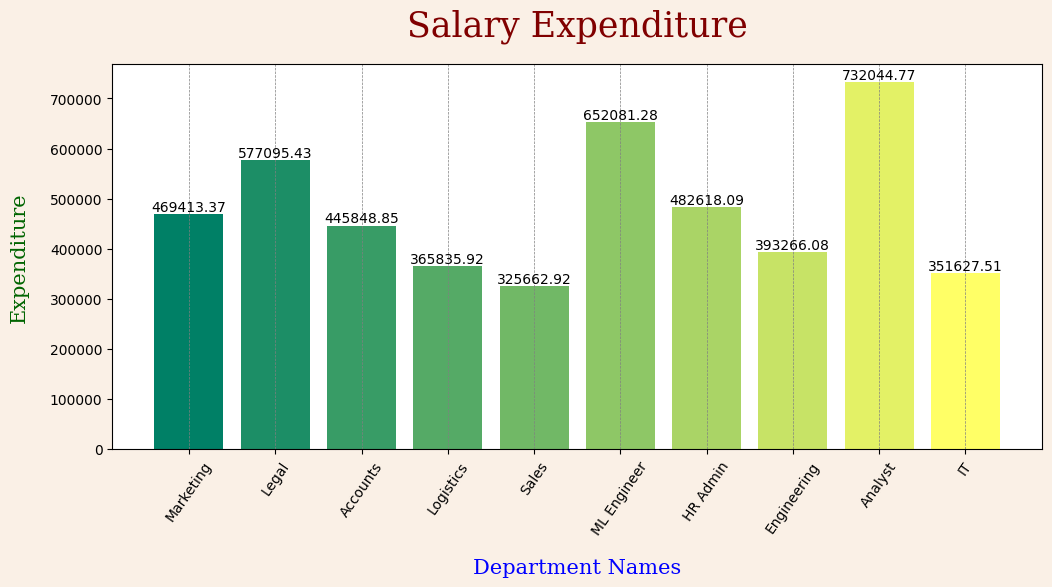

In [72]:
#SQL Query
query='''select Department,sum(Salary) as Total_Salary
from employees
group by Department;'''

#Exucting Query
D_salary=read_query(query=query)

#Assign Vairable
Department=D_salary['Department'].values
Salary=D_salary['Total_Salary'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(12,5),facecolor='linen')
plt.bar(height=Salary,x=Department,color=cmap)
plt.title('Salary Expenditure',fontdict={'family':'serif','color':'maroon','size':25},pad=20)
plt.xlabel('Department Names',fontdict={'family':'serif','color':'blue','size':15},labelpad=15)
plt.ylabel('Expenditure',fontdict={'family':'serif','color':'darkgreen','size':15},labelpad=15)
plt.xticks(rotation=55)

#Annotating Graph
for i in range(len(Department)):
    plt.annotate(text=Salary[i],xy=(i,Salary[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    

plt.grid(axis='x',linestyle='--',linewidth=0.5,color='gray')
plt.show()

# 13. Which subcategory has the highest average selling price?

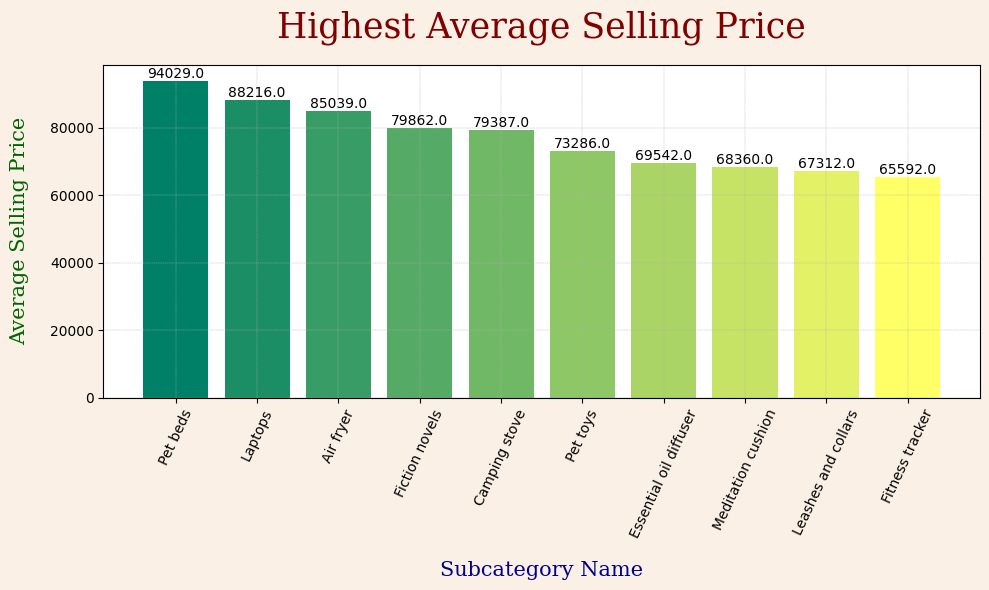

In [73]:
#SQL Query
query='''select 
	        SubcatName,avg(UnitPrice) as AvgSellingPrice
        from 
	        subcategories
        group by 
	        SubcatName
        order by
	        AvgSellingPrice desc
        limit 10;'''

#Executing Query
highest_sp=read_query(query=query)

#Assign Variable
name=highest_sp['SubcatName'].values
avgselling_price=highest_sp['AvgSellingPrice'].astype(float).values

#Cmap
cmap_value=np.linspace(0,1,10)
cmap=plt.cm.summer(cmap_value)

#Ploting Graph
plt.figure(figsize=(10,6),facecolor='linen')
plt.bar(height=avgselling_price,x=name,color=cmap)
plt.title('Highest Average Selling Price',fontdict={'family':'serif','size':25,'color':'maroon'},pad=20)
plt.xlabel('Subcategory Name',fontdict={'family':'serif','size':15,'color':'darkblue'},labelpad=15)
plt.ylabel('Average Selling Price',fontdict={'family':'serif','size':15,'color':'darkgreen'},labelpad=15)
plt.xticks(rotation=65)
plt.tight_layout()

#Annotating Graph
for i in range(len(name)):
    plt.annotate(text=avgselling_price[i],xy=(i,avgselling_price[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')

plt.grid(ls='--',lw=0.3)
plt.show()

# 14. What is the total revenue generated from sales in each category?

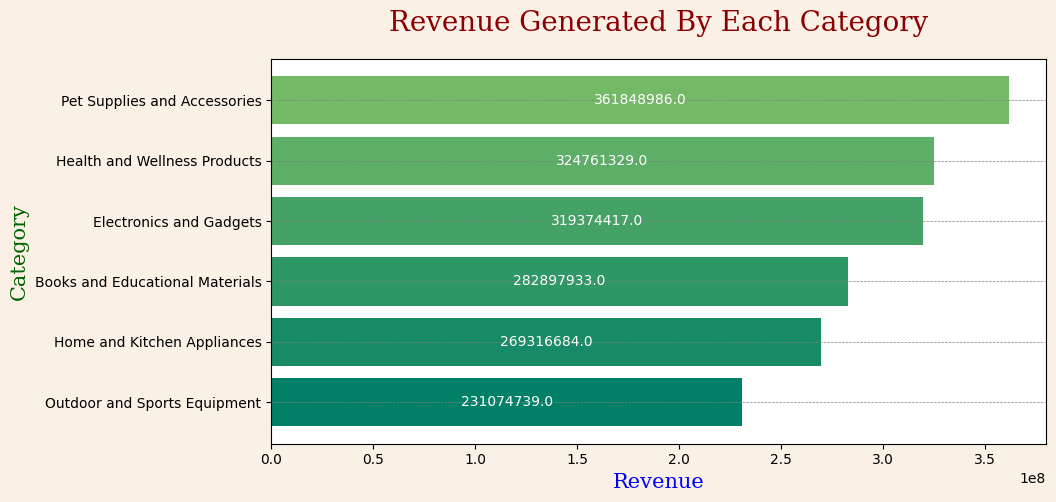

In [74]:
#SQL Query
query = '''select t.CategoryID, c.CategoryName, sum(t.TotalPrice) as Cat_revenue
from categories c
join (select b.CategoryID,s.TotalPrice
from salesdata s
join subcategories b
on s.SubcatID=b.SubcatID) t
on c.CategoryID=t.CategoryID
group by t.CategoryID,c.CategoryName
order by Cat_revenue;'''

#Executing Variable
Cat_rev=read_query(query=query)

#Assign Variable
Name=Cat_rev['CategoryName'].values
Revenue=Cat_rev['Cat_revenue'].astype(float).values

#Cmap
cmp_value=np.linspace(0,1,12)
cmap=plt.cm.summer(cmp_value)

#Ploting Graph
plt.figure(figsize=(10,5),facecolor='linen')
plt.barh(Name,Revenue,color=cmap)
plt.title('Revenue Generated By Each Category',fontdict={'family':'serif','size':20,'color':'darkred'},pad=20)
plt.xlabel('Revenue',fontdict={'family':'serif','size':15,'color':'blue'})
plt.ylabel('Category',fontdict={'family':'serif','size':15,'color':'darkgreen'})

#Annotating Graph
for i in range(len(Name)):
    plt.annotate(text=Revenue[i],xy=(Revenue[i]/2,i),color='white',
            horizontalalignment='center',
            verticalalignment='center')


plt.grid(axis='y',linestyle='--',linewidth=0.5,color='gray')
plt.show()